## CONSTRUYENDO MODELOS
<img src="data/logo.png" style="display: block; margin: 0 auto; width: 100%;">

In [1]:
### Importando librerías
import time
inicio = time.time()

import warnings
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, LeaveOneOut, KFold, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/hotusa_EDA.csv")
df

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,ADR,Country,Company,ReservedRoomType,IsRepeatedGuest,...,Mes_Reserva,Contract,Group,Transient,Transient-Party,BB,FB,HB,SC,Undefined
0,238,0,2,2,0,54.00,0.0,0,0.0,0,...,12,0,0,1,0,0,0,1,0,0
1,174,2,5,2,1,108.02,0.0,0,5.0,0,...,12,0,0,1,0,1,0,0,0,0
2,260,4,9,1,0,47.54,0.0,0,3.0,0,...,8,0,0,1,0,1,0,0,0,0
3,168,0,2,2,0,86.00,0.0,0,0.0,0,...,1,0,0,1,0,0,0,1,0,0
4,1,0,1,1,0,35.00,0.0,88,0.0,1,...,11,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33683,212,2,8,2,1,89.75,4.0,0,0.0,0,...,9,0,0,1,0,1,0,0,0,0
33684,169,2,9,2,0,202.27,5.0,0,4.0,0,...,9,0,0,0,1,1,0,0,0,0
33685,204,4,10,2,0,153.57,5.0,0,4.0,0,...,9,0,0,1,0,1,0,0,0,0
33686,211,4,10,2,0,112.80,4.0,0,3.0,0,...,9,1,0,0,0,0,0,1,0,0


In [3]:
df.columns

Index(['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Children', 'ADR', 'Country', 'Company', 'ReservedRoomType',
       'IsRepeatedGuest', 'IsCanceled', 'Mes_Estancia', 'Mes_Reserva',
       'Contract', 'Group', 'Transient', 'Transient-Party', 'BB', 'FB', 'HB',
       'SC', 'Undefined'],
      dtype='object')

0    28938
1     4750
Name: IsCanceled, dtype: int64


<Axes: title={'center': 'Distribución de las clases'}>

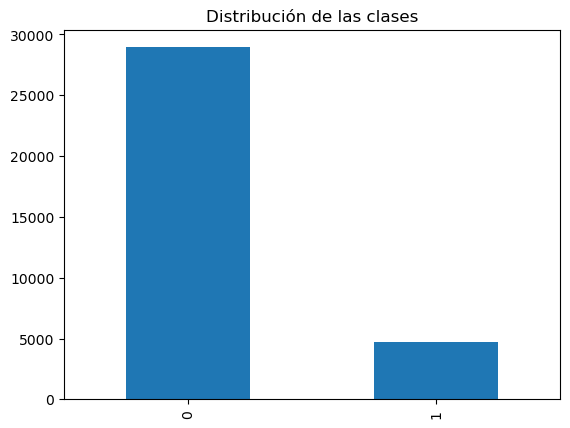

In [4]:
# Las poblaciones están bastante desbalanceadas, podrían tratar de igualarse un poco
target = df["IsCanceled"].value_counts()
print(target)
# Visualizamos nuevo dataframe con las clases balanceadas
df['IsCanceled'].value_counts().plot(kind='bar', title='Distribución de las clases')
# plt.savefig("data/preresampling.png")

Si buscamos un modelo con mejores métricas y estadísticas podríamos remuestrear las poblaciones para equipararlas un poco más,
utilizando el siguiente código comentado cambiaría totalmente el desempeño de los modelos posteriores.
Pasaríamos de una Población inicial (0: 28938, 1: 4750) a una Poblacion final sintética: (0: 21703, 1: 9500)
Y el mejor modelo pasaría a ser el GrandientBoostingClassifier con un f1-score de 0.95

<img src="data\postresampling.png" style="display: block; margin: 0 auto; width: 50%; float: left">

In [5]:
# # Si buscamos un modelo con estadísticas más altas
# # separamos las dos clases, reservas confirmadas 0, y reservas canceladas 1:

# class_0 = df[df["IsCanceled"] == 0]

# class_1 = df[df['IsCanceled'] == 1]

# print(f"Poblaciones antes del resampling: {len(class_0), len(class_1)}")

# # Hacemos undersampling de la clase 0 para balancear un poco el equilibrio poblacional:
# class_0_under = resample(class_0, 
#                          replace = True,    
#                          n_samples = len(class_0)*3//4,
#                          random_state = 42) 

# # Hacemos oversampling de la clase 1 para intentar equilibrar más las 2 poblaciones:
# class_1_over = resample(class_1, 
#                        replace = True,    
#                        n_samples = len(class_1)*2,  
#                        random_state = 42) 

# print(f"Poblaciones después del resampling: {len(class_0_under), len(class_1_over)}")
# # Creamos nuevo dataframe con la clase 1 sobremuestreada y la clase 0 inframuestreada
# df_new = pd.concat([class_1_over, class_0_under], axis=0)

# # Visualizamos nuevo dataframe con las clases balanceadas
# df_new['IsCanceled'].value_counts().plot(kind='bar', title='Distribución después del ReSampling')
# %matplotlib inline
# plt.savefig("data/postresampling.png")

df_new = df

In [6]:
# Separamos los datos:

y = df_new[['IsCanceled']]
X = df_new.drop(['IsCanceled'], axis=1)

In [7]:
X.shape, y.shape

((33688, 21), (33688, 1))

In [8]:
#Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

with open("data/escalador.sav", "wb") as file:
    pickle.dump(x_scaler, file)
    
X

array([[0.3229308 , 0.        , 0.04      , ..., 1.        , 0.        ,
        0.        ],
       [0.23609227, 0.10526316, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.35278155, 0.21052632, 0.18      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27679783, 0.21052632, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.28629579, 0.21052632, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.21845319, 0.21052632, 0.2       , ..., 1.        , 0.        ,
        0.        ]])

In [9]:
print(len(df_new[df_new["IsCanceled"]==1]))
df_cols = list(df_new.columns)
df_cols

4750


['LeadTime',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'ADR',
 'Country',
 'Company',
 'ReservedRoomType',
 'IsRepeatedGuest',
 'IsCanceled',
 'Mes_Estancia',
 'Mes_Reserva',
 'Contract',
 'Group',
 'Transient',
 'Transient-Party',
 'BB',
 'FB',
 'HB',
 'SC',
 'Undefined']

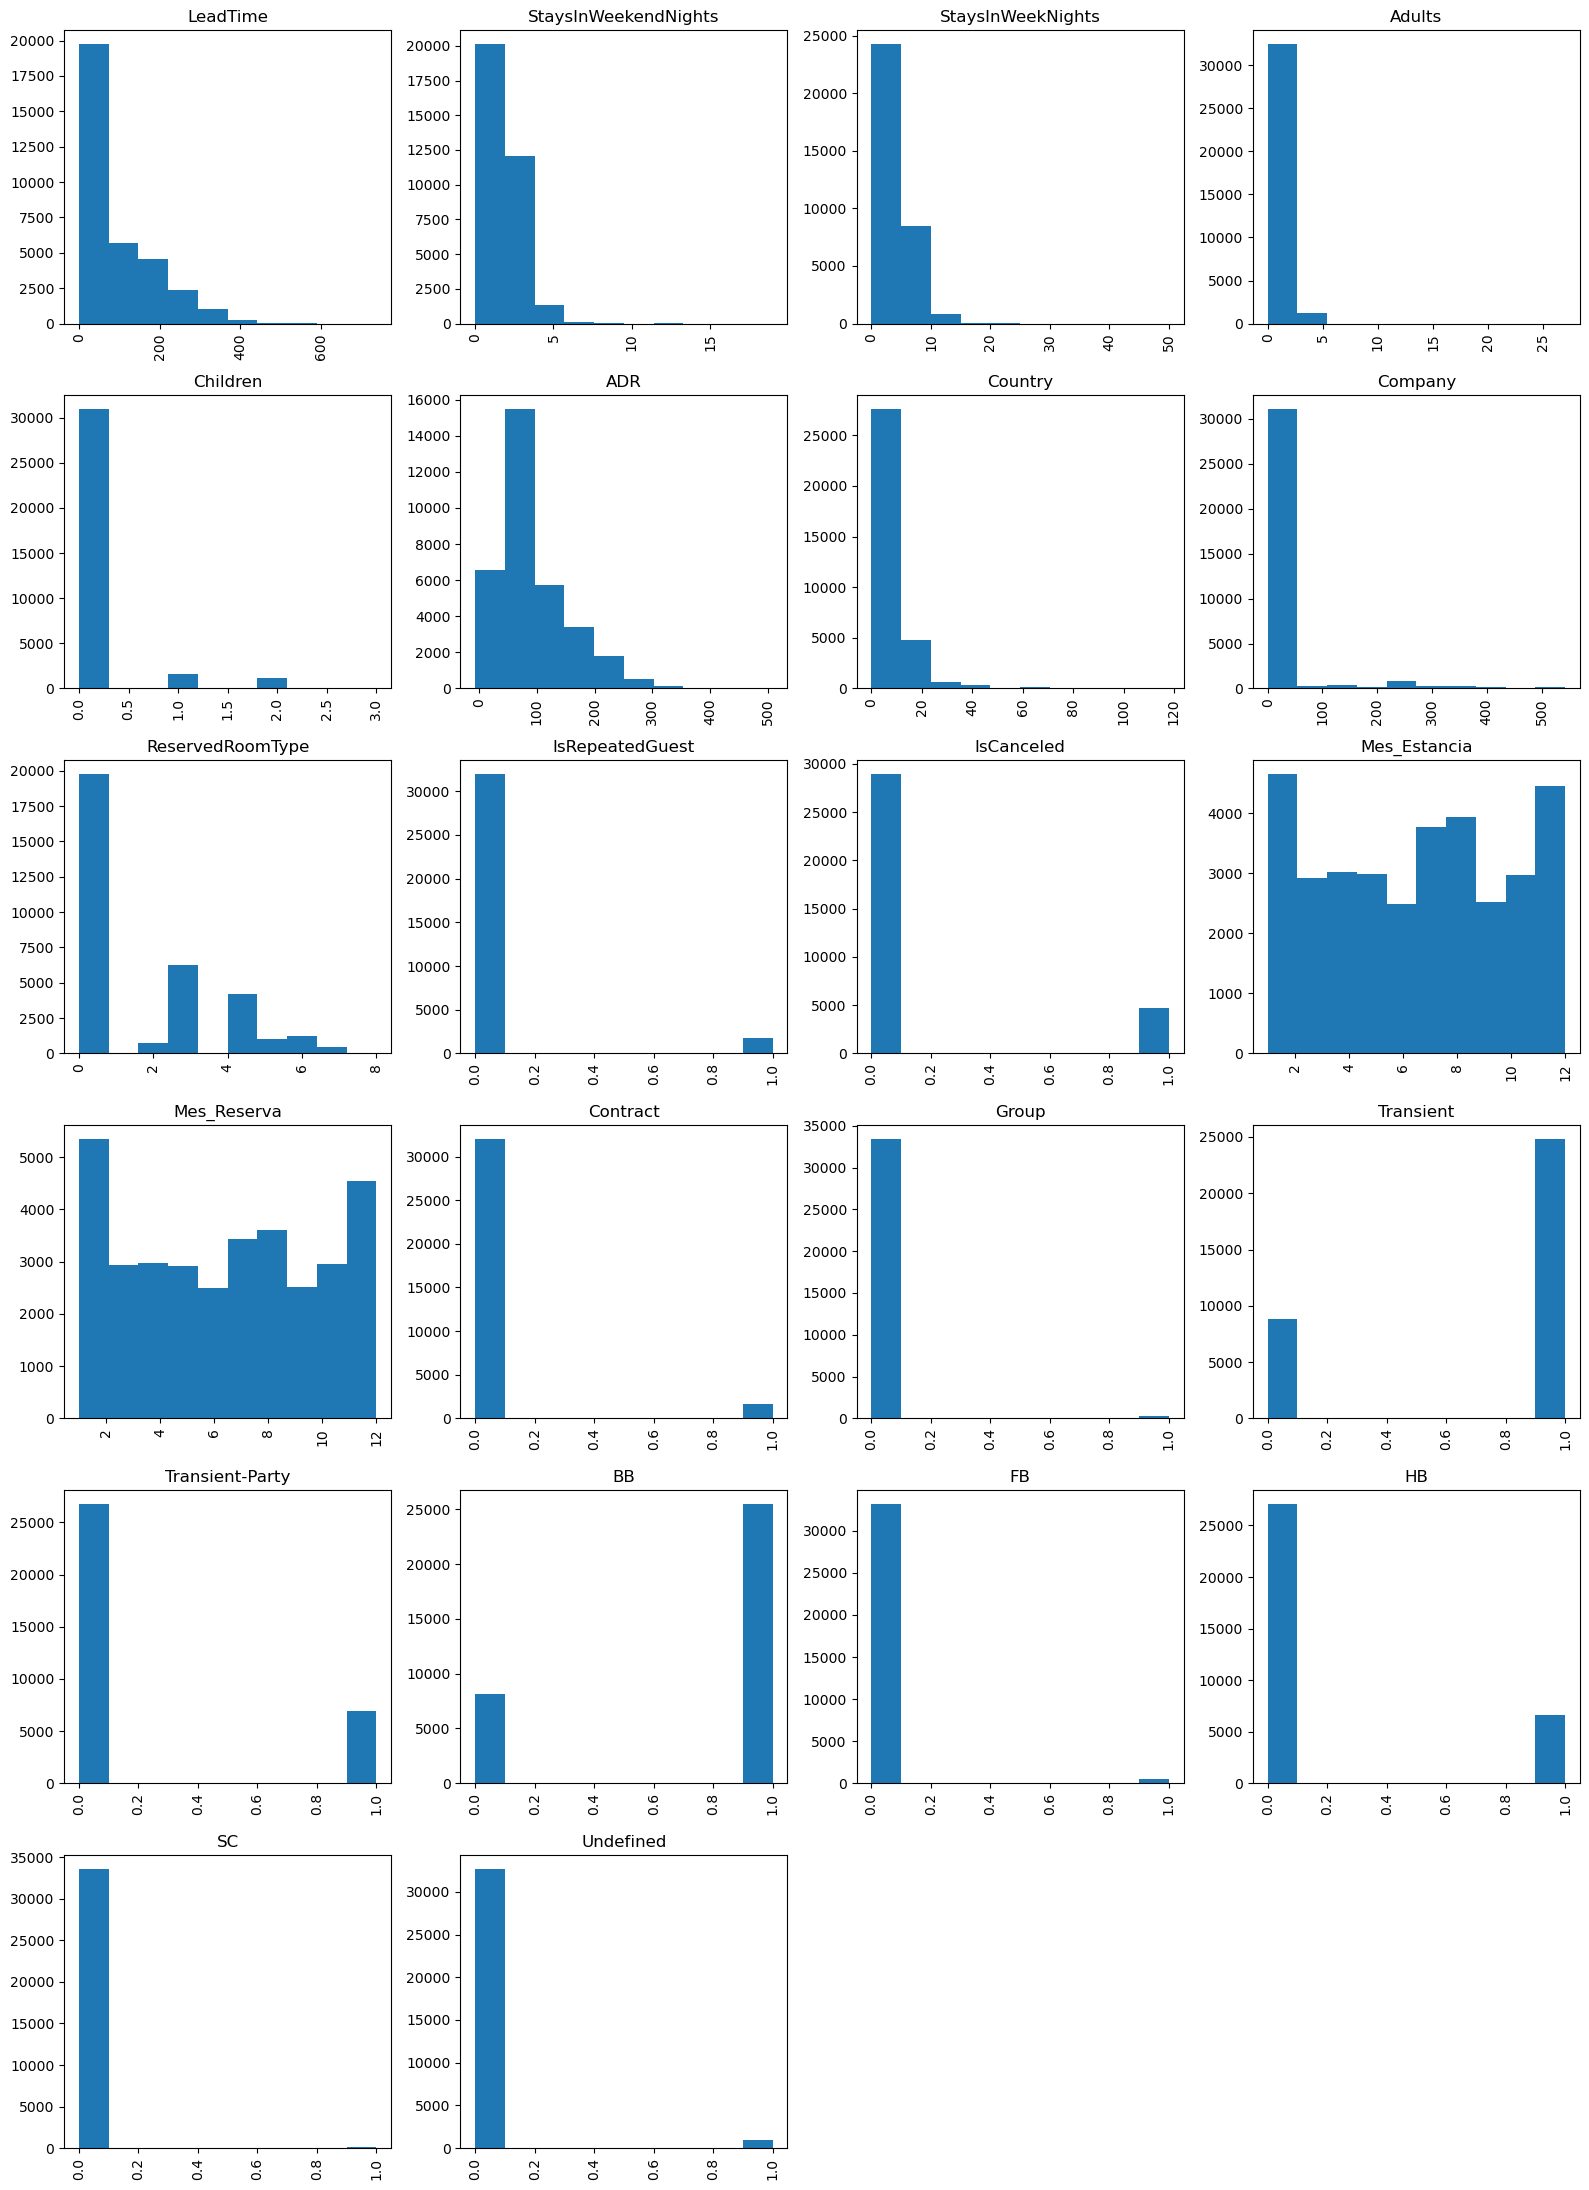

In [10]:
df_cols = list(df_new.columns)
df_cols

plt.figure(figsize=(16,22))
for i in range(len(df_cols)):
    plt.subplot(6,4,i+1)
    plt.title(df_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[df_cols[i]])
    plt.tight_layout()
# plt.savefig("data/columnasvis-over-norm.png")
plt.show()
%matplotlib inline

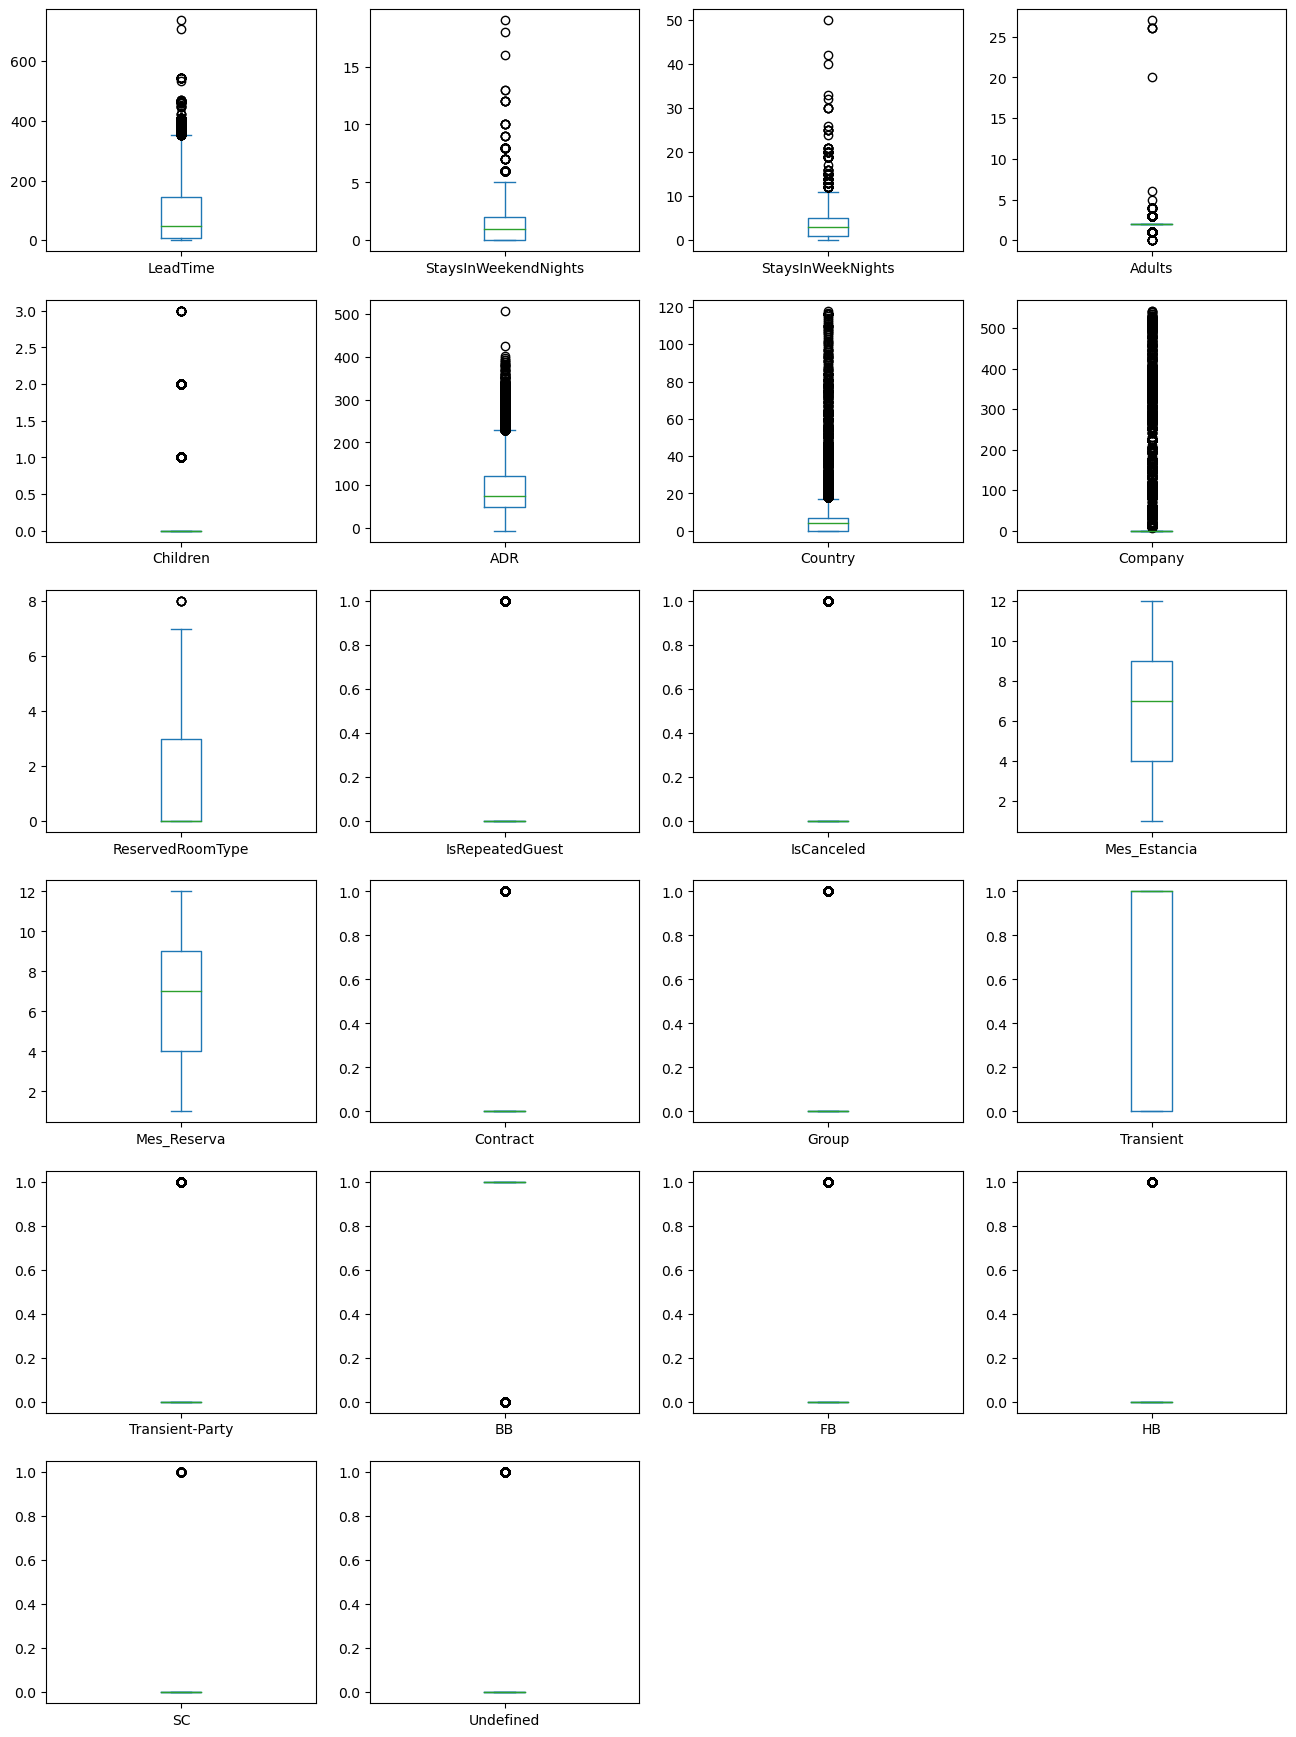

In [11]:
# nos encontramos muchos outliers
df_new.plot(kind="box", 
        subplots=True, 
        layout=(6,4), 
        figsize=(16,22));
# plt.savefig("data/outliers.png")

In [12]:
# Separamos los datos entre Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (23581, 21), y_train: (23581, 1)
X_test: (10107, 21),  y_test: (10107, 1)


In [13]:
# Separamos los datos de Test entre Test y Validación
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.3, random_state = 42, stratify = y_test)

print(f"X_test: {X_test.shape}, y_train: {y_test.shape}")
print(f"X_val: {X_val.shape},  y_test: {y_val.shape}")

X_test: (7074, 21), y_train: (7074, 1)
X_val: (3033, 21),  y_test: (3033, 1)




Iniciando modelo 0


Informe sobre las métricas del modelo LogisticRegression():
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      6077
           1       0.78      0.13      0.23       997

    accuracy                           0.87      7074
   macro avg       0.83      0.56      0.58      7074
weighted avg       0.86      0.87      0.83      7074

Confusion Matrix del modelo LogisticRegression():


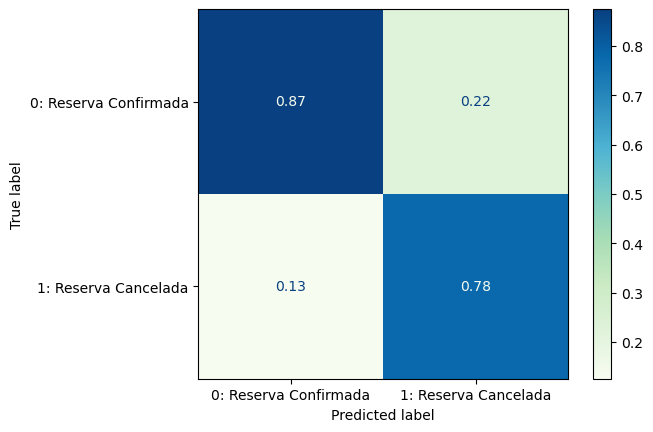

Generando DataFrame comparativo LogisticRegression():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.890823,0.109177
1,0,0,0.893584,0.106416
2,0,0,0.901394,0.098606
3,1,0,0.968036,0.031964
4,0,0,0.999979,0.000021
...,...,...,...,...
7069,0,0,0.826668,0.173332
7070,0,0,0.831671,0.168329
7071,1,0,0.929572,0.070428
7072,0,0,0.626345,0.373655


Feature Importances del modelo LogisticRegression():




Iniciando modelo 1


Informe sobre las métricas del modelo RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6077
           1       0.94      0.68      0.79       997

    accuracy                           0.95      7074
   macro avg       0.95      0.84      0.88      7074
weighted avg       0.95      0.95      0.95      7074

Confusion Matrix del modelo RandomForestClassifier():


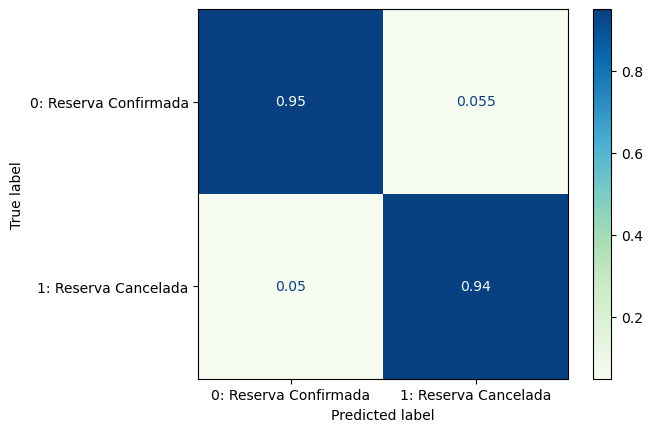

Generando DataFrame comparativo RandomForestClassifier():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.97,0.03
1,0,0,0.97,0.03
2,0,0,0.99,0.01
3,1,0,0.99,0.01
4,0,0,1.00,0.00
...,...,...,...,...
7069,0,0,0.97,0.03
7070,0,0,0.90,0.10
7071,1,0,0.80,0.20
7072,0,0,0.93,0.07


Feature Importances del modelo RandomForestClassifier():


Columna: LeadTime Importancia: 18.8 %
Columna: StaysInWeekendNights Importancia: 3.46 %
Columna: StaysInWeekNights Importancia: 5.46 %
Columna: Adults Importancia: 1.55 %
Columna: Children Importancia: 1.05 %
Columna: ADR Importancia: 15.38 %
Columna: Country Importancia: 10.48 %
Columna: Company Importancia: 1.13 %
Columna: ReservedRoomType Importancia: 3.38 %
Columna: IsRepeatedGuest Importancia: 0.58 %
Columna: IsCanceled Importancia: 15.84 %
Columna: Mes_Estancia Importancia: 17.67 %
Columna: Mes_Reserva Importancia: 0.31 %
Columna: Contract Importancia: 0.06 %
Columna: Group Importancia: 1.29 %
Columna: Transient Importancia: 0.65 %
Columna: Transient-Party Importancia: 0.96 %
Columna: BB Importancia: 0.6 %
Columna: FB Importancia: 0.86 %
Columna: HB Importancia: 0.03 %
Columna: SC Importancia: 0.48 %


Iniciando modelo 2


Informe sobre las métricas del modelo AdaBoostClassifier():
              precision    recall  f1-sc

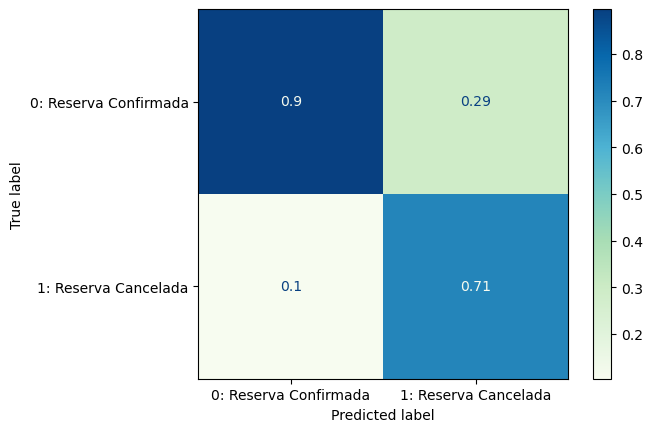

Generando DataFrame comparativo AdaBoostClassifier():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.512759,0.487241
1,0,0,0.511550,0.488450
2,0,0,0.516665,0.483335
3,1,0,0.527398,0.472602
4,0,0,0.686412,0.313588
...,...,...,...,...
7069,0,0,0.513233,0.486767
7070,0,0,0.511561,0.488439
7071,1,0,0.515677,0.484323
7072,0,0,0.512673,0.487327


Feature Importances del modelo AdaBoostClassifier():


Columna: LeadTime Importancia: 20.0 %
Columna: StaysInWeekendNights Importancia: 0.0 %
Columna: StaysInWeekNights Importancia: 4.0 %
Columna: Adults Importancia: 2.0 %
Columna: Children Importancia: 0.0 %
Columna: ADR Importancia: 18.0 %
Columna: Country Importancia: 14.0 %
Columna: Company Importancia: 2.0 %
Columna: ReservedRoomType Importancia: 6.0 %
Columna: IsRepeatedGuest Importancia: 2.0 %
Columna: IsCanceled Importancia: 6.0 %
Columna: Mes_Estancia Importancia: 18.0 %
Columna: Mes_Reserva Importancia: 2.0 %
Columna: Contract Importancia: 0.0 %
Columna: Group Importancia: 2.0 %
Columna: Transient Importancia: 0.0 %
Columna: Transient-Party Importancia: 0.0 %
Columna: BB Importancia: 0.0 %
Columna: FB Importancia: 2.0 %
Columna: HB Importancia: 0.0 %
Columna: SC Importancia: 2.0 %


Iniciando modelo 3


Informe sobre las métricas del modelo ExtraTreesClassifier():
              precision    recall  f1-score   support

       

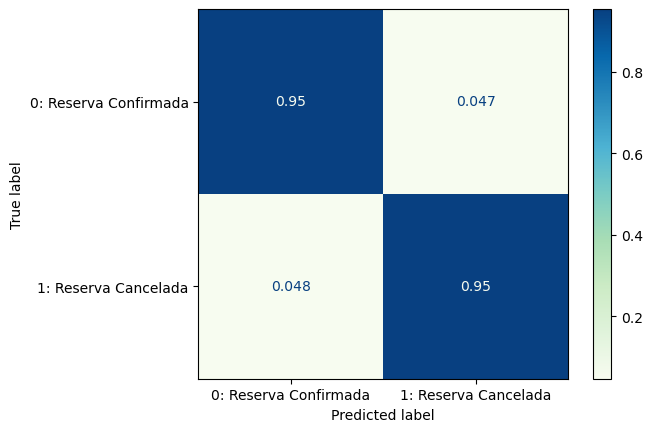

Generando DataFrame comparativo ExtraTreesClassifier():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.97,0.03
1,0,0,0.97,0.03
2,0,0,1.00,0.00
3,1,0,0.97,0.03
4,0,0,1.00,0.00
...,...,...,...,...
7069,0,0,0.96,0.04
7070,0,0,0.92,0.08
7071,1,0,0.66,0.34
7072,0,0,0.87,0.13


Feature Importances del modelo ExtraTreesClassifier():


Columna: LeadTime Importancia: 15.98 %
Columna: StaysInWeekendNights Importancia: 4.17 %
Columna: StaysInWeekNights Importancia: 6.47 %
Columna: Adults Importancia: 1.86 %
Columna: Children Importancia: 1.2 %
Columna: ADR Importancia: 12.37 %
Columna: Country Importancia: 10.09 %
Columna: Company Importancia: 1.07 %
Columna: ReservedRoomType Importancia: 3.69 %
Columna: IsRepeatedGuest Importancia: 0.59 %
Columna: IsCanceled Importancia: 17.4 %
Columna: Mes_Estancia Importancia: 21.17 %
Columna: Mes_Reserva Importancia: 0.32 %
Columna: Contract Importancia: 0.04 %
Columna: Group Importancia: 0.96 %
Columna: Transient Importancia: 0.54 %
Columna: Transient-Party Importancia: 0.62 %
Columna: BB Importancia: 0.58 %
Columna: FB Importancia: 0.55 %
Columna: HB Importancia: 0.03 %
Columna: SC Importancia: 0.32 %


Iniciando modelo 4


Informe sobre las métricas del modelo SGDClassifier(loss='modified_huber', max_iter=5):
              

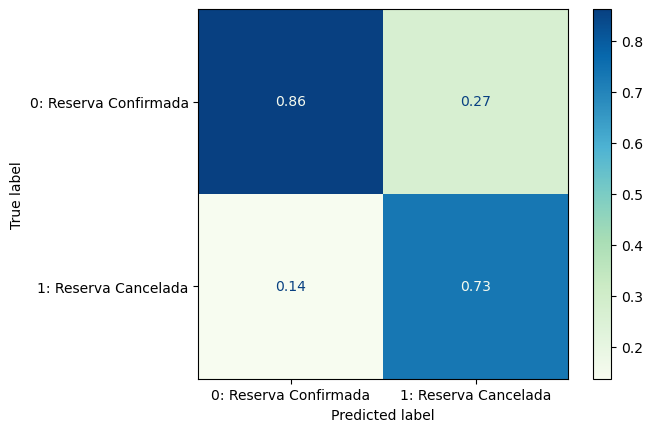

Generando DataFrame comparativo SGDClassifier(loss='modified_huber', max_iter=5):


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,1.000000,0.000000
1,0,0,1.000000,0.000000
2,0,0,1.000000,0.000000
3,1,0,1.000000,0.000000
4,0,0,1.000000,0.000000
...,...,...,...,...
7069,0,0,1.000000,0.000000
7070,0,0,1.000000,0.000000
7071,1,0,1.000000,0.000000
7072,0,0,0.706006,0.293994


Feature Importances del modelo SGDClassifier(loss='modified_huber', max_iter=5):




Iniciando modelo 5


Informe sobre las métricas del modelo GradientBoostingClassifier(max_depth=14):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6077
           1       0.92      0.79      0.85       997

    accuracy                           0.96      7074
   macro avg       0.95      0.89      0.91      7074
weighted avg       0.96      0.96      0.96      7074

Confusion Matrix del modelo GradientBoostingClassifier(max_depth=14):


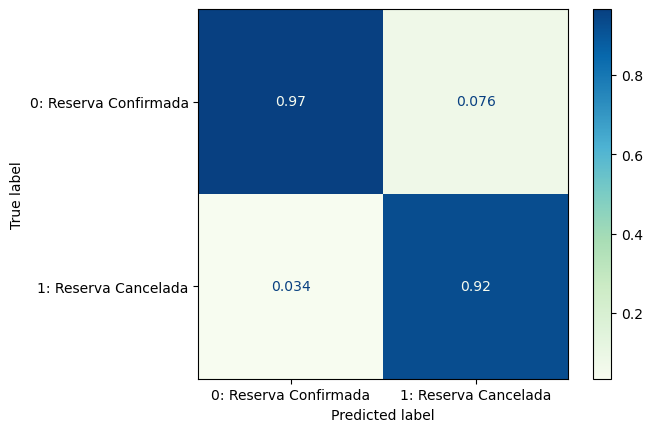

Generando DataFrame comparativo GradientBoostingClassifier(max_depth=14):


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.999476,0.000524
1,0,0,0.999520,0.000480
2,0,0,0.994063,0.005937
3,1,0,0.999917,0.000083
4,0,0,0.999960,0.000040
...,...,...,...,...
7069,0,0,0.999794,0.000206
7070,0,0,0.996828,0.003172
7071,1,0,0.845414,0.154586
7072,0,0,0.999924,0.000076


Feature Importances del modelo GradientBoostingClassifier(max_depth=14):


Columna: LeadTime Importancia: 20.19 %
Columna: StaysInWeekendNights Importancia: 1.69 %
Columna: StaysInWeekNights Importancia: 3.05 %
Columna: Adults Importancia: 0.64 %
Columna: Children Importancia: 0.52 %
Columna: ADR Importancia: 12.62 %
Columna: Country Importancia: 6.55 %
Columna: Company Importancia: 0.76 %
Columna: ReservedRoomType Importancia: 1.65 %
Columna: IsRepeatedGuest Importancia: 0.29 %
Columna: IsCanceled Importancia: 25.33 %
Columna: Mes_Estancia Importancia: 24.02 %
Columna: Mes_Reserva Importancia: 0.05 %
Columna: Contract Importancia: 0.05 %
Columna: Group Importancia: 0.71 %
Columna: Transient Importancia: 0.46 %
Columna: Transient-Party Importancia: 0.42 %
Columna: BB Importancia: 0.42 %
Columna: FB Importancia: 0.41 %
Columna: HB Importancia: 0.01 %
Columna: SC Importancia: 0.16 %


Iniciando modelo 6


Informe sobre las métricas del modelo SVC(probability=True):
              precisio

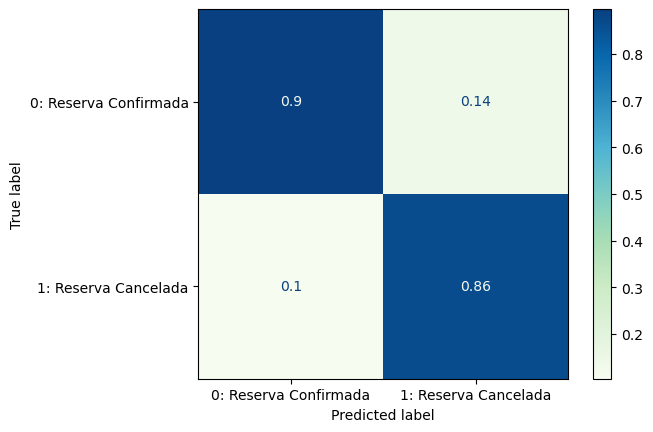

Generando DataFrame comparativo SVC(probability=True):


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.900145,0.099855
1,0,0,0.902495,0.097505
2,0,0,0.900096,0.099904
3,1,0,0.920216,0.079784
4,0,0,0.964854,0.035146
...,...,...,...,...
7069,0,0,0.913991,0.086009
7070,0,0,0.900873,0.099127
7071,1,0,0.856221,0.143779
7072,0,1,0.178342,0.821658


Feature Importances del modelo SVC(probability=True):




Iniciando modelo 7


Informe sobre las métricas del modelo KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6077
           1       0.93      0.63      0.75       997

    accuracy                           0.94      7074
   macro avg       0.93      0.81      0.86      7074
weighted avg       0.94      0.94      0.94      7074

Confusion Matrix del modelo KNeighborsClassifier():


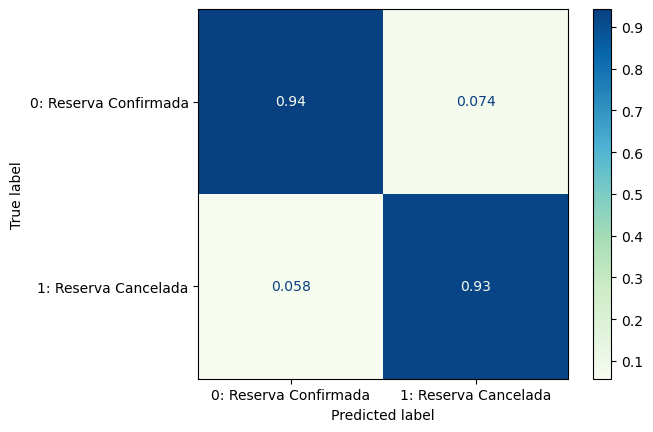

Generando DataFrame comparativo KNeighborsClassifier():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,1.0,0.0
1,0,0,1.0,0.0
2,0,0,1.0,0.0
3,1,0,1.0,0.0
4,0,0,1.0,0.0
...,...,...,...,...
7069,0,0,1.0,0.0
7070,0,0,1.0,0.0
7071,1,0,0.8,0.2
7072,0,0,0.8,0.2


Feature Importances del modelo KNeighborsClassifier():




Iniciando modelo 8


Informe sobre las métricas del modelo MLPClassifier():
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6077
           1       0.99      0.79      0.88       997

    accuracy                           0.97      7074
   macro avg       0.98      0.89      0.93      7074
weighted avg       0.97      0.97      0.97      7074

Confusion Matrix del modelo MLPClassifier():


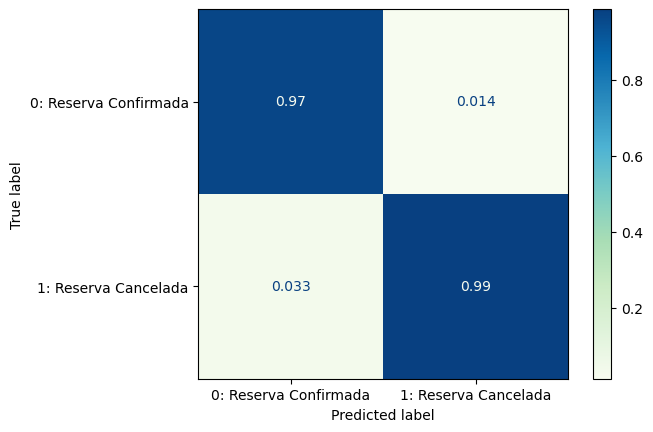

Generando DataFrame comparativo MLPClassifier():


,Valores Reales,Valores Predichos,Valores_0_proba,Valores_1_proba
0,0,0,0.992453,7.546871e-03
1,0,0,0.973761,2.623862e-02
2,0,0,0.940975,5.902493e-02
3,1,0,0.999111,8.888145e-04
4,0,0,1.000000,4.138177e-07
...,...,...,...,...
7069,0,0,0.995414,4.586242e-03
7070,0,0,0.888897,1.111028e-01
7071,1,1,0.079763,9.202373e-01
7072,0,0,1.000000,1.023382e-07


Feature Importances del modelo MLPClassifier():




In [23]:
# Ejecutamos todos los modelos seguidos:

model = {}
yhat = {}

accuracy = {}
recall = {}
precision = {}

accuracies = {}
recalls = {}
precisions = {}

classificationreport = {}
cm = {}
pred_df = {}
proba = {}
df_proba = {}

algoritmos = {0:LogisticRegression(),
              1:RandomForestClassifier(), 
              2:AdaBoostClassifier(),
              3:ExtraTreesClassifier(), 
              4:SGDClassifier(loss="modified_huber", penalty="l2", max_iter=5), 
              5:GradientBoostingClassifier(max_depth=14),
              6:SVC(probability = True), 
              7:KNeighborsClassifier(n_neighbors = 5, p = 2),
              8:MLPClassifier()
              }

for i in range(len(algoritmos)):
    print("\n")
    print(f'Iniciando modelo {i}')
    model[i]= algoritmos[i]
    model[i].fit(X_train, y_train)
    
    yhat[i] = model[i].predict(X_test)

    # Calculando las métricas del modelo:
    accuracy[i] = accuracy_score(y_test, yhat[i])
    precision[i] = precision_score(y_test, yhat[i], average = "macro")
    recall[i] = recall_score(y_test, yhat[i], average = "macro")

    accuracies[f'modelo {i}'] = accuracy[i]
    recalls[f'modelo {i}'] = recall[i]
    precisions[f'modelo {i}'] = precision[i]

    # Calculando classification report:
    classificationreport[i] = classification_report(y_test, yhat[i]) 

    # Informando:
    print("\n")
    print(f"Informe sobre las métricas del modelo {model[i]}:")
    print(classificationreport[i])
    print(f"Confusion Matrix del modelo {model[i]}:")

    # Calculando y visualizando la "confusion matrix":
    cm[i] = confusion_matrix(y_test, yhat[i])
    ConfusionMatrixDisplay.from_predictions(y_test, yhat[i], normalize = "pred", cmap = "GnBu", display_labels = ("0: Reserva Confirmada","1: Reserva Cancelada"))
    plt.savefig(f"data/cm{i}.png")
    plt.show()
    
    print(f"Generando DataFrame comparativo {model[i]}:")
    pred_df[i] = pd.DataFrame()
    pred_df[i]['Valores Reales'] = y_test
    pred_df[i]['Valores Predichos'] = yhat[i]
    
    try:
        proba[i] = model[i].predict_proba(X_test)
        df_proba[i] = pd.DataFrame(proba[i], columns=['Valores_0_proba', 'Valores_1_proba'])
        pred_df[i] = pd.concat([pred_df[i].reset_index(drop=True), df_proba[i]], axis=1)
        
    except:
        pass
    
    display(pred_df[i])
    
    print(f"Feature Importances del modelo {model[i]}:")
    print("\n")

    try:
        model[i].feature_importances_
        for col, imp in zip(df_new, model[i].feature_importances_):
            print(f"Columna: {col} Importancia: {round((imp*100),2)} %")
    except:
        pass


In [24]:
model[8].best_loss_

0.11041345472449117

In [25]:
model[8].score(X,y)

0.9685644739966753

In [26]:
# Creamos un dataframe con las estadísticas de los 9 modelos:

df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])

df_recalls = pd.DataFrame(recalls.items(), columns=['Model', 'Recall'])

df_precisions = pd.DataFrame(precisions.items(), columns=['Model', 'Precision'])

df_metricas = pd.DataFrame(algoritmos.items(), columns= ['Model','Model Name'])


df_mets = pd.merge(left = df_accuracy, right = df_recalls, left_on= "Model", right_on= "Model")
df_metrics = pd.merge(left = df_mets, right = df_precisions, left_on= "Model", right_on ="Model")
df_metrics["Model Name"] = df_metricas['Model Name'].apply(lambda x : str(x))
df_metrics["Model parameters"] = df_metricas['Model Name']
df_metrics.sort_values(by= ['Recall'], inplace= True, ascending= False)
df_metrics

,Model,Accuracy,Recall,Precision,Model Name,Model parameters
8,modelo 8,0.968900,0.894281,0.976463,MLPClassifier(),MLPClassifier()
5,modelo 5,0.960701,0.887412,0.945036,GradientBoostingClassifier(max_depth=14),([DecisionTreeRegressor(criterion='friedman_ms...
3,modelo 3,0.951654,0.842739,0.952239,ExtraTreesClassifier(),"(ExtraTreeClassifier(random_state=1026087765),..."
1,modelo 1,0.949816,0.838735,0.947504,RandomForestClassifier(),"(DecisionTreeClassifier(max_features='sqrt', r..."
7,modelo 7,0.940769,0.810831,0.934281,KNeighborsClassifier(),KNeighborsClassifier()
6,modelo 6,0.894261,0.644578,0.879414,SVC(probability=True),SVC(probability=True)
2,modelo 2,0.884789,0.642420,0.804687,AdaBoostClassifier(),"(DecisionTreeClassifier(max_depth=1, random_st..."
0,modelo 0,0.872349,0.563072,0.825590,LogisticRegression(),LogisticRegression()
4,modelo 4,0.861747,0.514140,0.797106,"SGDClassifier(loss='modified_huber', max_iter=5)","SGDClassifier(loss='modified_huber', max_iter=5)"


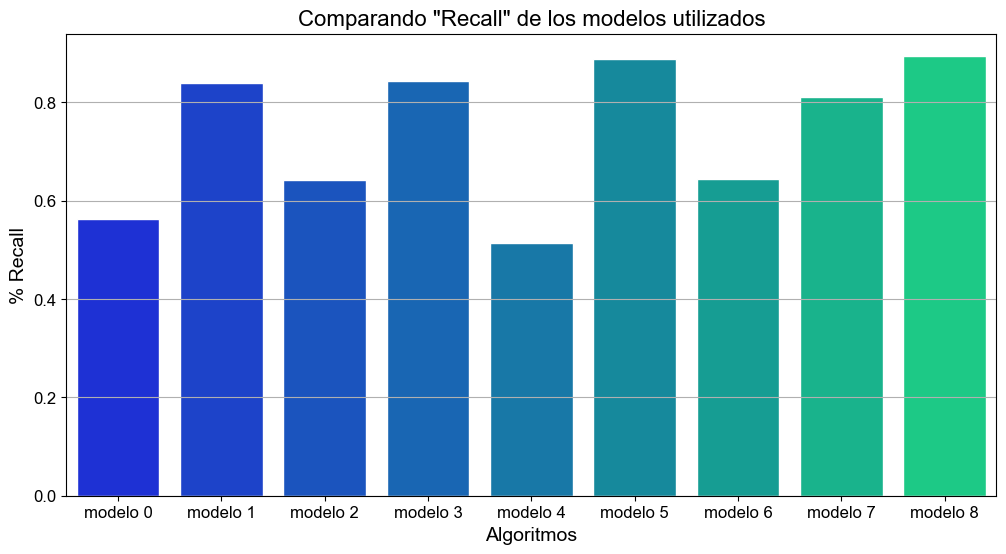

In [27]:
plt.figure(figsize = (12,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(recalls.keys()), y=list(recalls.values()), palette="winter")
plt.title('Comparando "Recall" de los modelos utilizados', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("% Recall", fontsize = 14)
plt.xlabel("Algoritmos", fontsize = 14)

plt.savefig("data/com-recall.png")
plt.show()

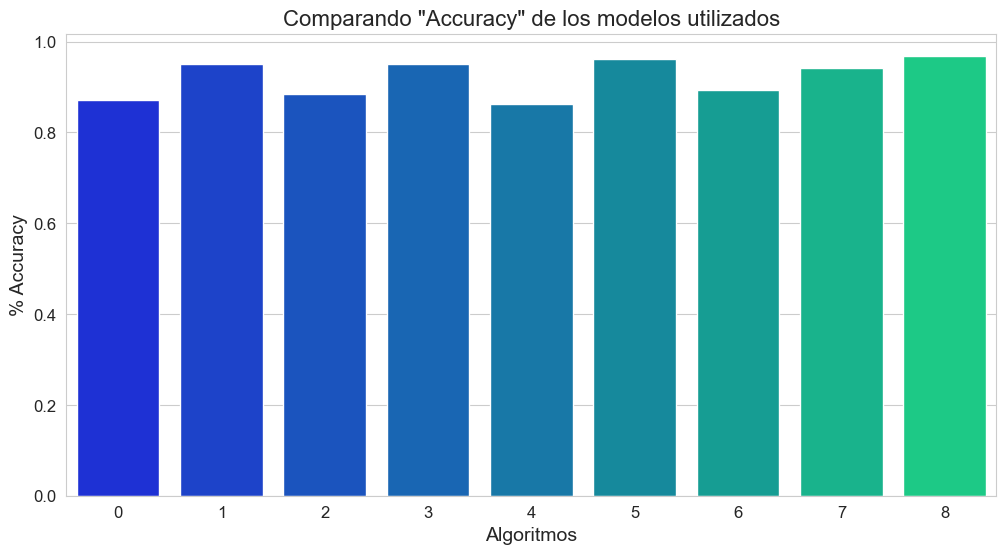

In [28]:
plt.figure(figsize = (12,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="winter")
plt.title('Comparando "Accuracy" de los modelos utilizados', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("% Accuracy", fontsize = 14)
plt.xlabel("Algoritmos", fontsize = 14)

plt.savefig("data/com-accuracy.png")
plt.show()

### Para terminar, vamos a probar el modelo con datos completamente nuevos y vamos explicar el desempeño del modelo y que alternativas podemos tomar para mejorar el desempeño del modelo.

In [29]:
# Calculamos todas las predicciones con valores nuevos:

accuraciesval={}
precisionsval={}
recallsval={}
predictions={}
classificationreportval={}


for i in range(len(algoritmos)):  

    # Haciendo las predicciones
    predictions[i] = model[i].predict(X_val)
    predictions[i]
    # Calculando las métricas del modelo:
    accuracy[i] = accuracy_score(y_val, predictions[i])
    precision[i] = precision_score(y_val, predictions[i], average = "macro")
    recall[i] = recall_score(y_val, predictions[i], average = "macro")

    accuraciesval[f'modelo{i}'] = accuracy[i]
    recallsval[f'modelo{i}'] = recall[i]
    precisionsval[f'modelo{i}'] = precision[i]

    # Calculando classification report:
    classificationreportval[i] = classification_report(y_val, predictions[i]) 

    # Informando:
    print("\n")
    print(f'Informe sobre las métricas del modelo {model[i]}:')
    print("\n")
    print(classificationreportval[i])
    
display(accuraciesval, precisionsval, recallsval)



Informe sobre las métricas del modelo LogisticRegression():


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2605
           1       0.85      0.11      0.19       428

    accuracy                           0.87      3033
   macro avg       0.86      0.55      0.56      3033
weighted avg       0.87      0.87      0.83      3033



Informe sobre las métricas del modelo RandomForestClassifier():


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2605
           1       0.95      0.65      0.77       428

    accuracy                           0.95      3033
   macro avg       0.95      0.82      0.87      3033
weighted avg       0.95      0.95      0.94      3033



Informe sobre las métricas del modelo AdaBoostClassifier():


              precision    recall  f1-score   support

           0       0.89      0.98      0.94      2605
           1       0.72      0.29      0.

{'modelo0': 0.8714144411473789,
 'modelo1': 0.9455984174085065,
 'modelo2': 0.8832838773491593,
 'modelo3': 0.9436201780415431,
 'modelo4': 0.862182657434883,
 'modelo5': 0.9594460929772503,
 'modelo6': 0.8885591823277283,
 'modelo7': 0.9399934058687768,
 'modelo8': 0.9643916913946587}

{'modelo0': 0.8618104509343181,
 'modelo1': 0.9456717138576964,
 'modelo2': 0.8053830823282858,
 'modelo3': 0.9387349370902003,
 'modelo4': 0.8374730692741134,
 'modelo5': 0.9575971145016209,
 'modelo6': 0.8708759143717728,
 'modelo7': 0.941095979840447,
 'modelo8': 0.9760046097257509}

{'modelo0': 0.5522028091197733,
 'modelo1': 0.8228635621647802,
 'modelo2': 0.6333103126625648,
 'modelo3': 0.8197593592480312,
 'modelo4': 0.5146111001488869,
 'modelo5': 0.8709526970061169,
 'modelo6': 0.6236896155846952,
 'modelo7': 0.8030037490806681,
 'modelo8': 0.8767606328591673}

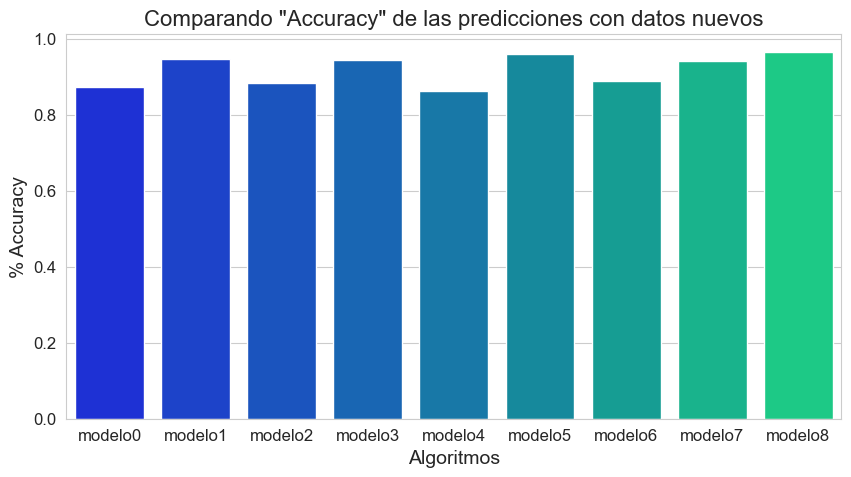

In [36]:
# Comparando la "Accuracy" de las predicciones con datos nuevos:

plt.figure(figsize = (10, 5))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuraciesval.keys(),), y=list(accuraciesval.values()), palette="winter")
# sns.barplot(x=list(recallsval.keys()), y=list(recallsval.values()), palette="Set1")
# sns.barplot(x=list(precisionsval.keys()), y=list(precisionsval.values()), palette="Set1")
plt.title('Comparando "Accuracy" de las predicciones con datos nuevos', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("% Accuracy", fontsize = 14)
plt.xlabel("Algoritmos", fontsize = 14)

plt.savefig("data/val-accuracy.png")
plt.show()

In [31]:
# Seleccionamos el modelo que nos interesa, el MLPClassifier:
# model= model[8]

# Exportar el modelo:
# with open("data/MLP.sav", "wb") as file:
#     pickle.dump(model, file)

In [32]:
fin = time.time()
print(fin-inicio)

794.2030761241913


<table>
    <caption>Matrices de Confusión comparativas de los Modelos</caption>
   <td> 
    <tr>
         <td> Logistic Regression</td>
         <td> Random Forest</td>
         <td> Ada Boost</td>
    </tr>
    <tr>      
        <td><img src="data/cm0.png" style="width: 400px;"></td>
        <td><img src="data/cm1.png" style="width: 400px;"></td>
        <td><img src="data/cm2.png" style="width: 400px;"></td>
    </tr>
    <tr>
         <td> Extra Trees</td>
         <td> SGD </td>
         <td> Gradient Boosting</td>
    </tr>
    <tr>
        <td><img src="data/cm3.png" style="width: 400px;"></td>
        <td><img src="data/cm4.png" style="width: 400px;"></td>
        <td><img src="data/cm5.png" style="width: 400px;"></td>
    </tr>
    <tr>
         <td> SVC</td>
         <td> KNeighbors </td>
         <td> MLP </td>
    </tr>
    <tr>
        <td><img src="data/cm6.PNG" style="width: 400px;"></td>
        <td><img src="data/cm7.PNG" style="width: 400px;"></td>
        <td><img src="data/cm8.PNG" style="width: 400px;"></td>
    </tr>
</table>